In [1]:
import os
import sys
import glob
import csv

import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /.config/matplotlib because the default path (/tmp/matplotlib-l7ovi2t1) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [18]:
print('CSV Paths:')
glob.glob('./*.csv')

CSV Paths:


['./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-batch_loss.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Class0_Background.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Class2_White_Matter.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Freq_weighted.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_MeanAcc.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_PixelAcc.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Class0_Background.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Class1_Gray_Matter.csv',
 './

In [2]:
def read_tb_csv(csvfilepath: str):
    """Read a TensorBoard csv file and returns its content
        Inputs: 
            csvfilepath: csv file path
        Outputs: 
            wall_time : wall time since first step
            step : step numbers
            value : data values at each step
    """
    with open(csvfilepath, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # Fieldnames: ['Wall time', 'Step', 'Value']
        # print(f'fieldnames: {reader.fieldnames}')
        
        wall_time, step, value = [], [], []
        for row in reader:
            wall_time.append(float(row['Wall time']))
            step.append(int(row['Step']))
            value.append(float(row['Value']))
            
    wall_time = np.array(wall_time)
    wall_time -= wall_time[0]
    
    return wall_time, step, value

## Loss func

In [3]:
print('CSV Paths:')
glob.glob('./*.csv')

CSV Paths:


['./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200720_122933_fold_6_train-tag-batch_loss.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-batch_loss.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Mean.csv',
 './run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-batch_loss.csv']

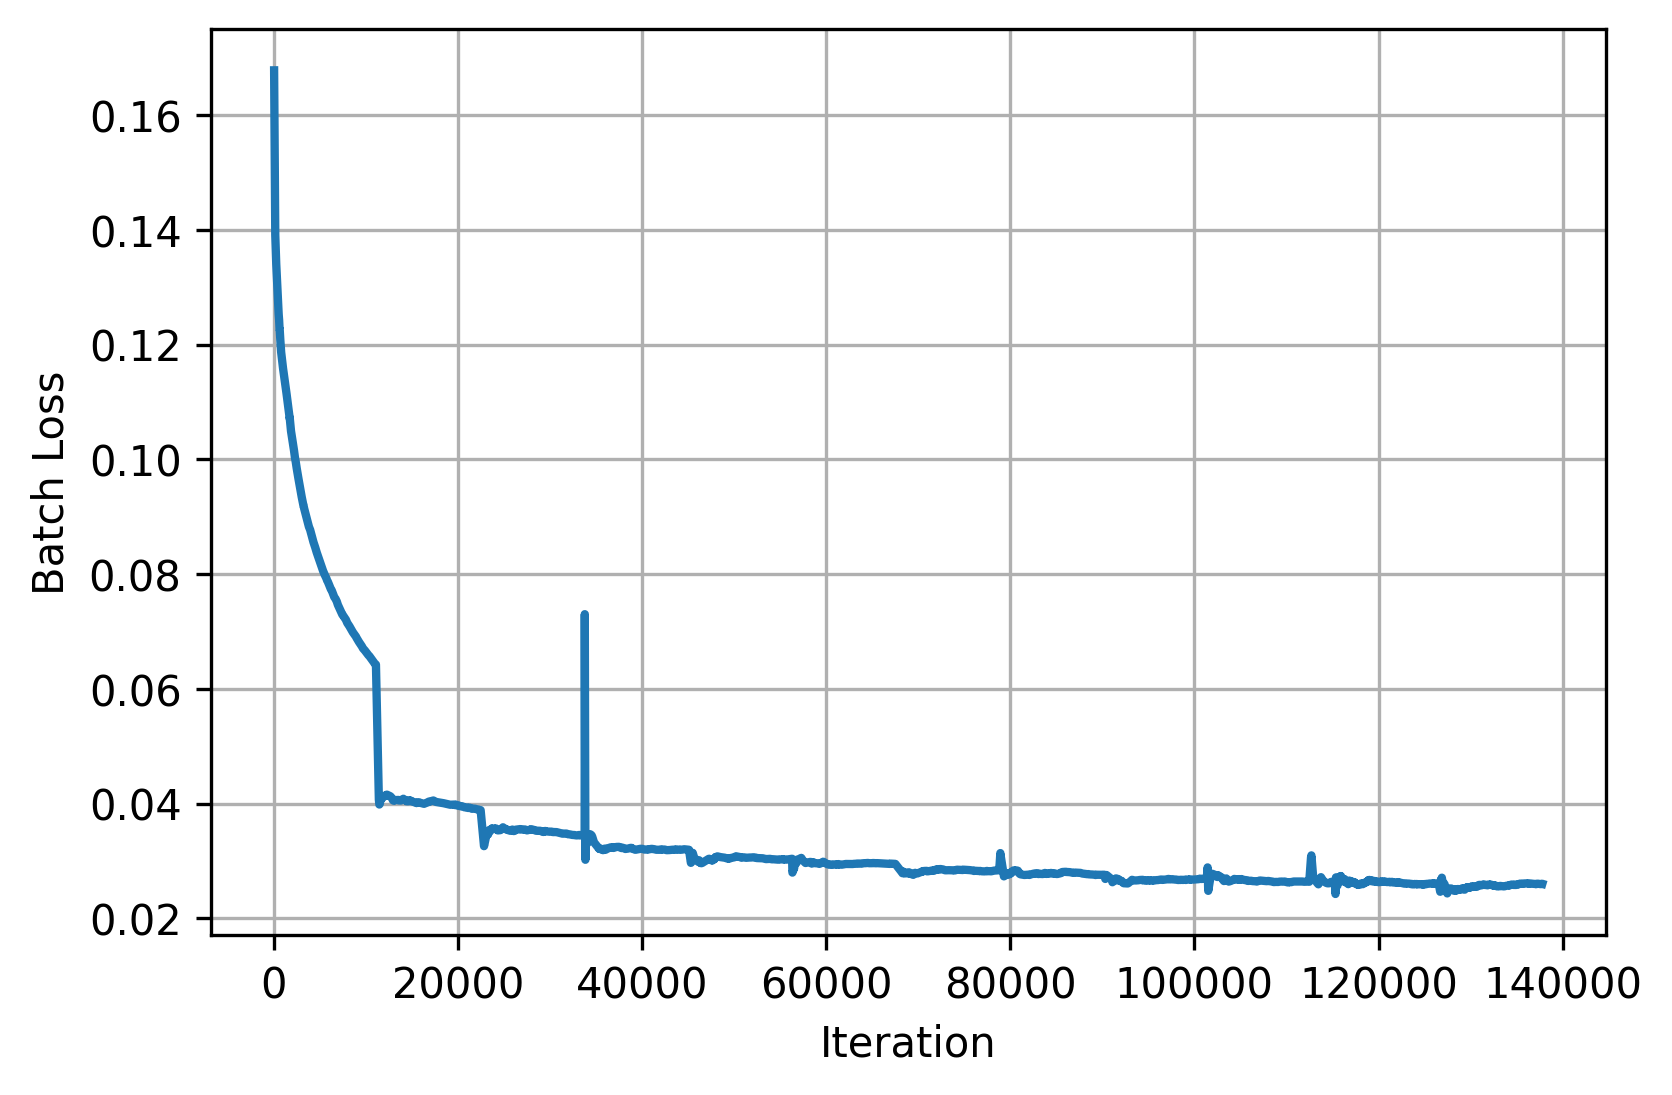

In [26]:
# _, step, value \
#     = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200720_122933_fold_6_train-tag-batch_loss.csv')

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-batch_loss.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-batch_loss.csv')

# Cutoff at end
cutoff = step_re.index(22508)
step_re, value_re = step_re[:cutoff+1], value_re[:cutoff+1]
# Increment by last step count
step_re = [s + step[-1] for s in step_re]

epoch_train_batch_loss = (step+step_re, value+value_re)

plt.figure(dpi=300)
plt.plot(epoch_train_batch_loss[0], epoch_train_batch_loss[1], '-', linewidth=2, label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Batch Loss')
# plt.title('Epoch_IoU/Class0_Background')
plt.grid()
# plt.legend()

### UNet_Zero_Pad_2019O-512-BSCCE
Combining retrain results of epoch IoU

In [4]:
### UNet_Zero_Pad_2019O-512-BSCCE
### Combining retrain results of epoch IoU
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_IoU_Freq_weighted.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_IoU_Freq_weighted.csv')
epoch_train_freq_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_IoU_Freq_weighted.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_IoU_Freq_weighted.csv')
epoch_val_freq_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_MeanAcc.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_MeanAcc.csv')
epoch_train_meanacc_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_MeanAcc.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_MeanAcc.csv')
epoch_val_meanacc_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_train-tag-epoch_PixelAcc.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_train-tag-epoch_PixelAcc.csv')
epoch_train_pixacc_bscce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355_validation-tag-epoch_PixelAcc.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-20200615_225355-retrain_20200618_143421_validation-tag-epoch_PixelAcc.csv')
epoch_val_pixacc_bscce = (step+step_re, value+value_re)

In [5]:
### UNet_Zero_Pad_2019O-512-SCCE
### Combining retrain results of epoch IoU
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean_scce = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean_scce = (step+step_re, value+value_re)

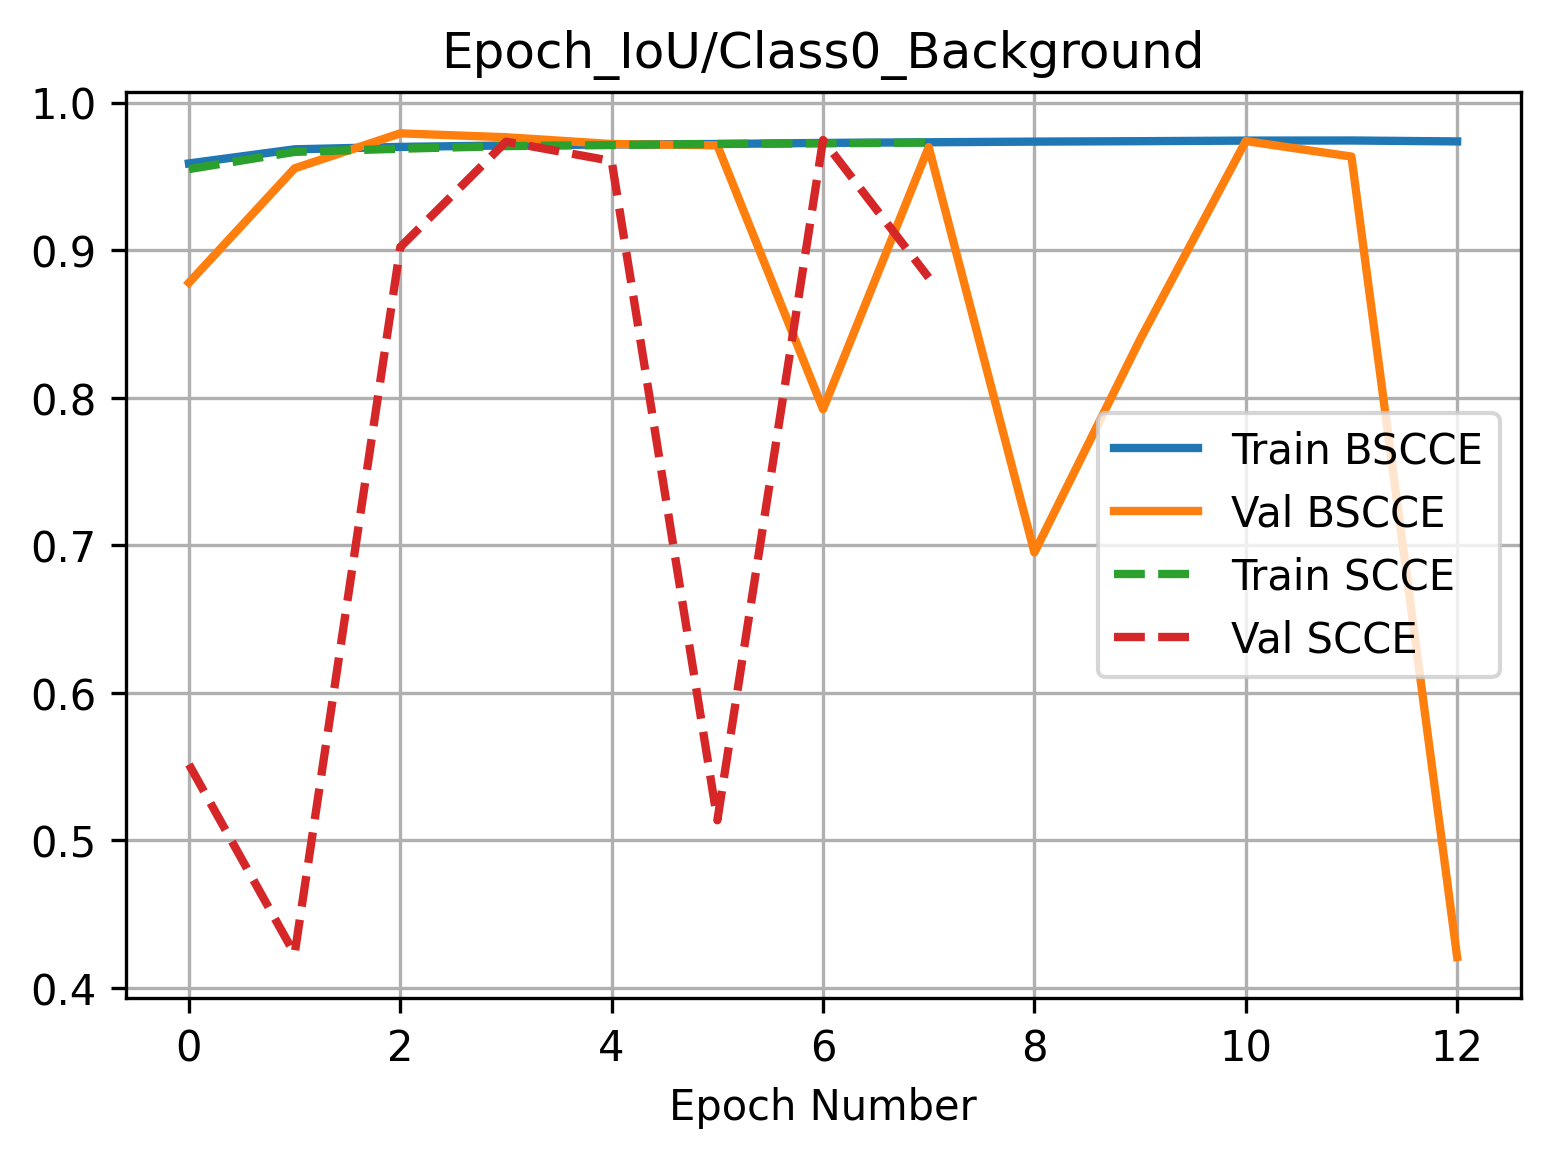

In [6]:
plt.figure(dpi=300)
plt.plot(epoch_train_back_bscce[0], epoch_train_back_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_back_bscce[0], epoch_val_back_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.plot(epoch_train_back_scce[0], epoch_train_back_scce[1], '--', linewidth=2, label='Train SCCE')
plt.plot(epoch_val_back_scce[0], epoch_val_back_scce[1], '--', linewidth=2, label='Val SCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class0_Background')
plt.grid()
plt.legend()

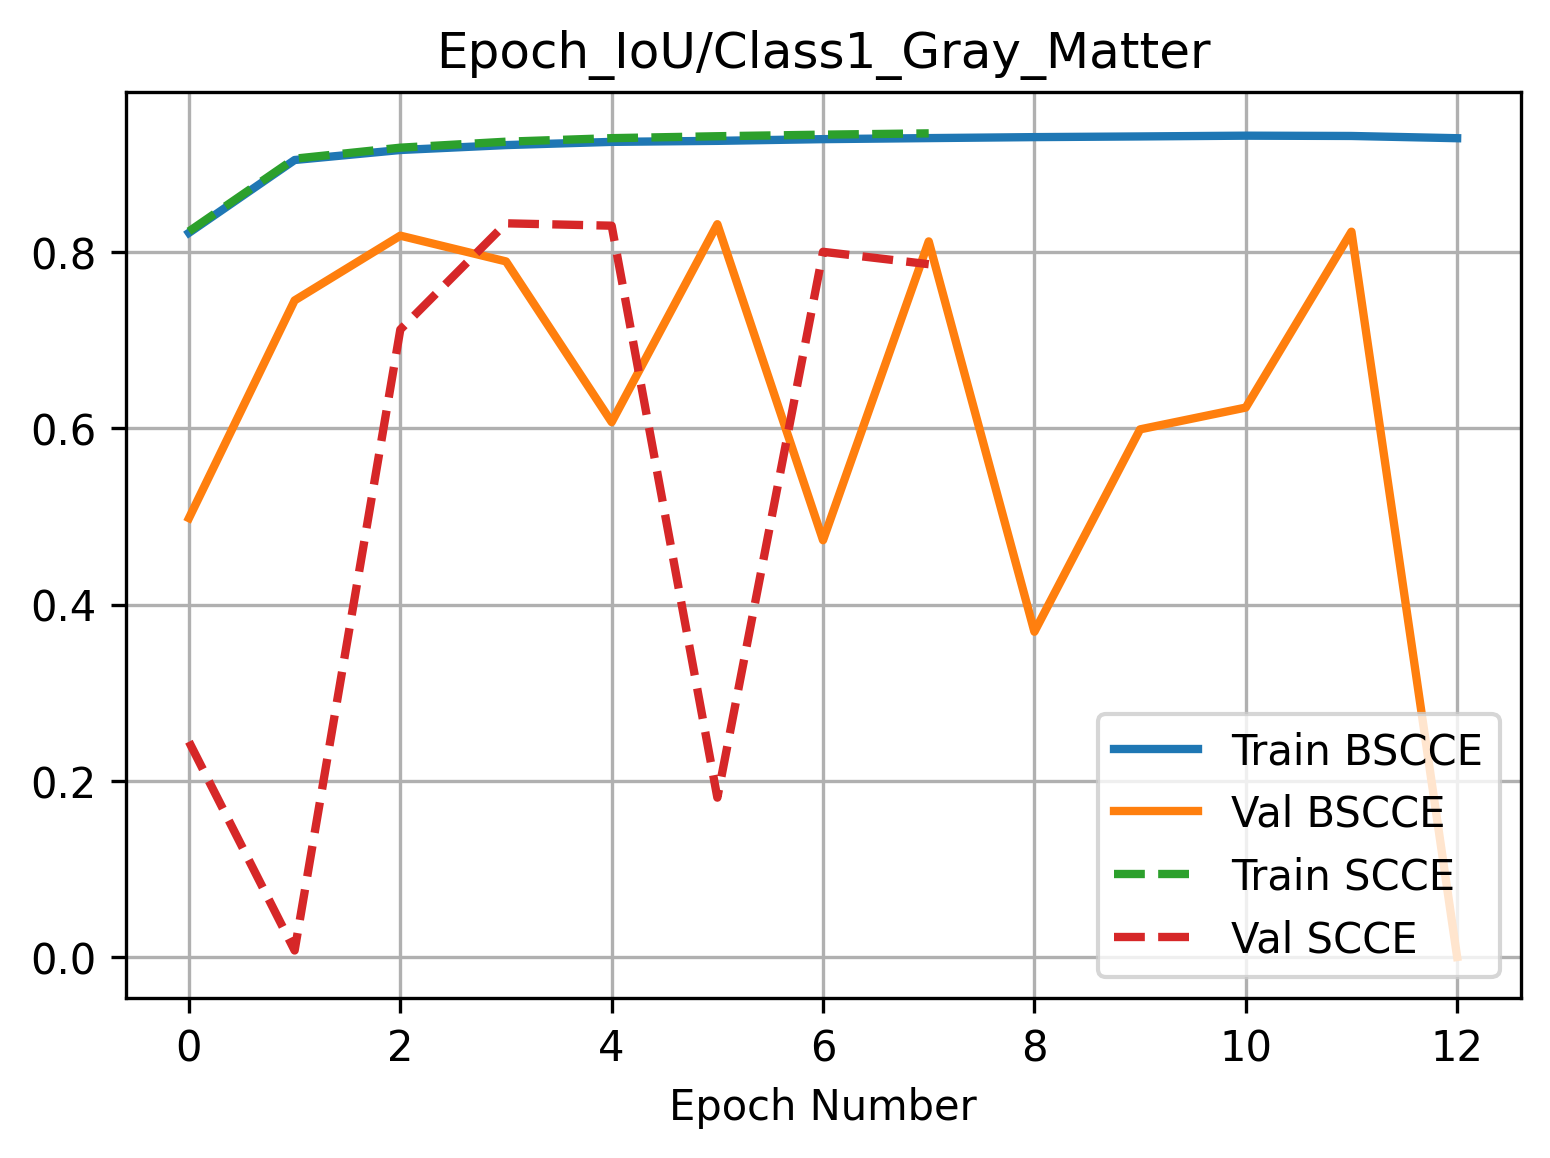

In [10]:
plt.figure(dpi=300)
plt.plot(epoch_train_gray_bscce[0], epoch_train_gray_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_gray_bscce[0], epoch_val_gray_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.plot(epoch_train_gray_scce[0], epoch_train_gray_scce[1], '--', linewidth=2, label='Train SCCE')
plt.plot(epoch_val_gray_scce[0], epoch_val_gray_scce[1], '--', linewidth=2, label='Val SCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class1_Gray_Matter')
plt.grid()
plt.legend()

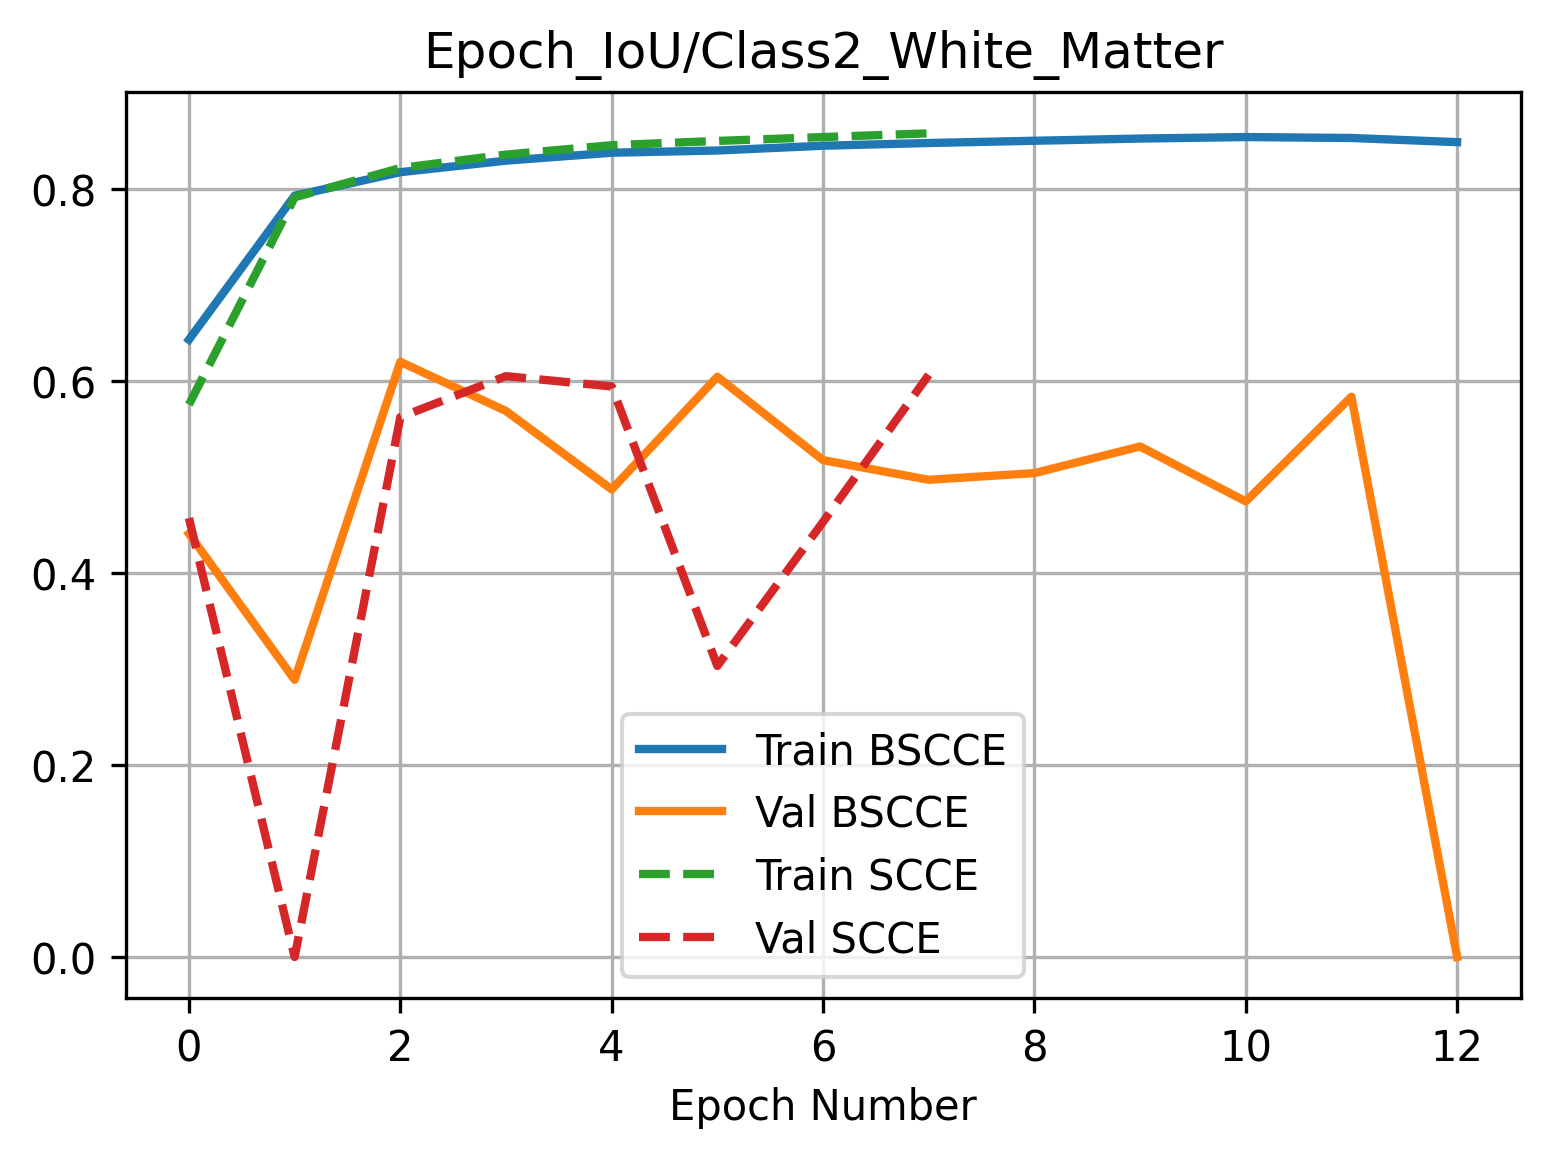

In [11]:
plt.figure(dpi=300)
plt.plot(epoch_train_white_bscce[0], epoch_train_white_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_white_bscce[0], epoch_val_white_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.plot(epoch_train_white_scce[0], epoch_train_white_scce[1], '--', linewidth=2, label='Train SCCE')
plt.plot(epoch_val_white_scce[0], epoch_val_white_scce[1], '--', linewidth=2, label='Val SCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class2_White_Matter')
plt.grid()
plt.legend()

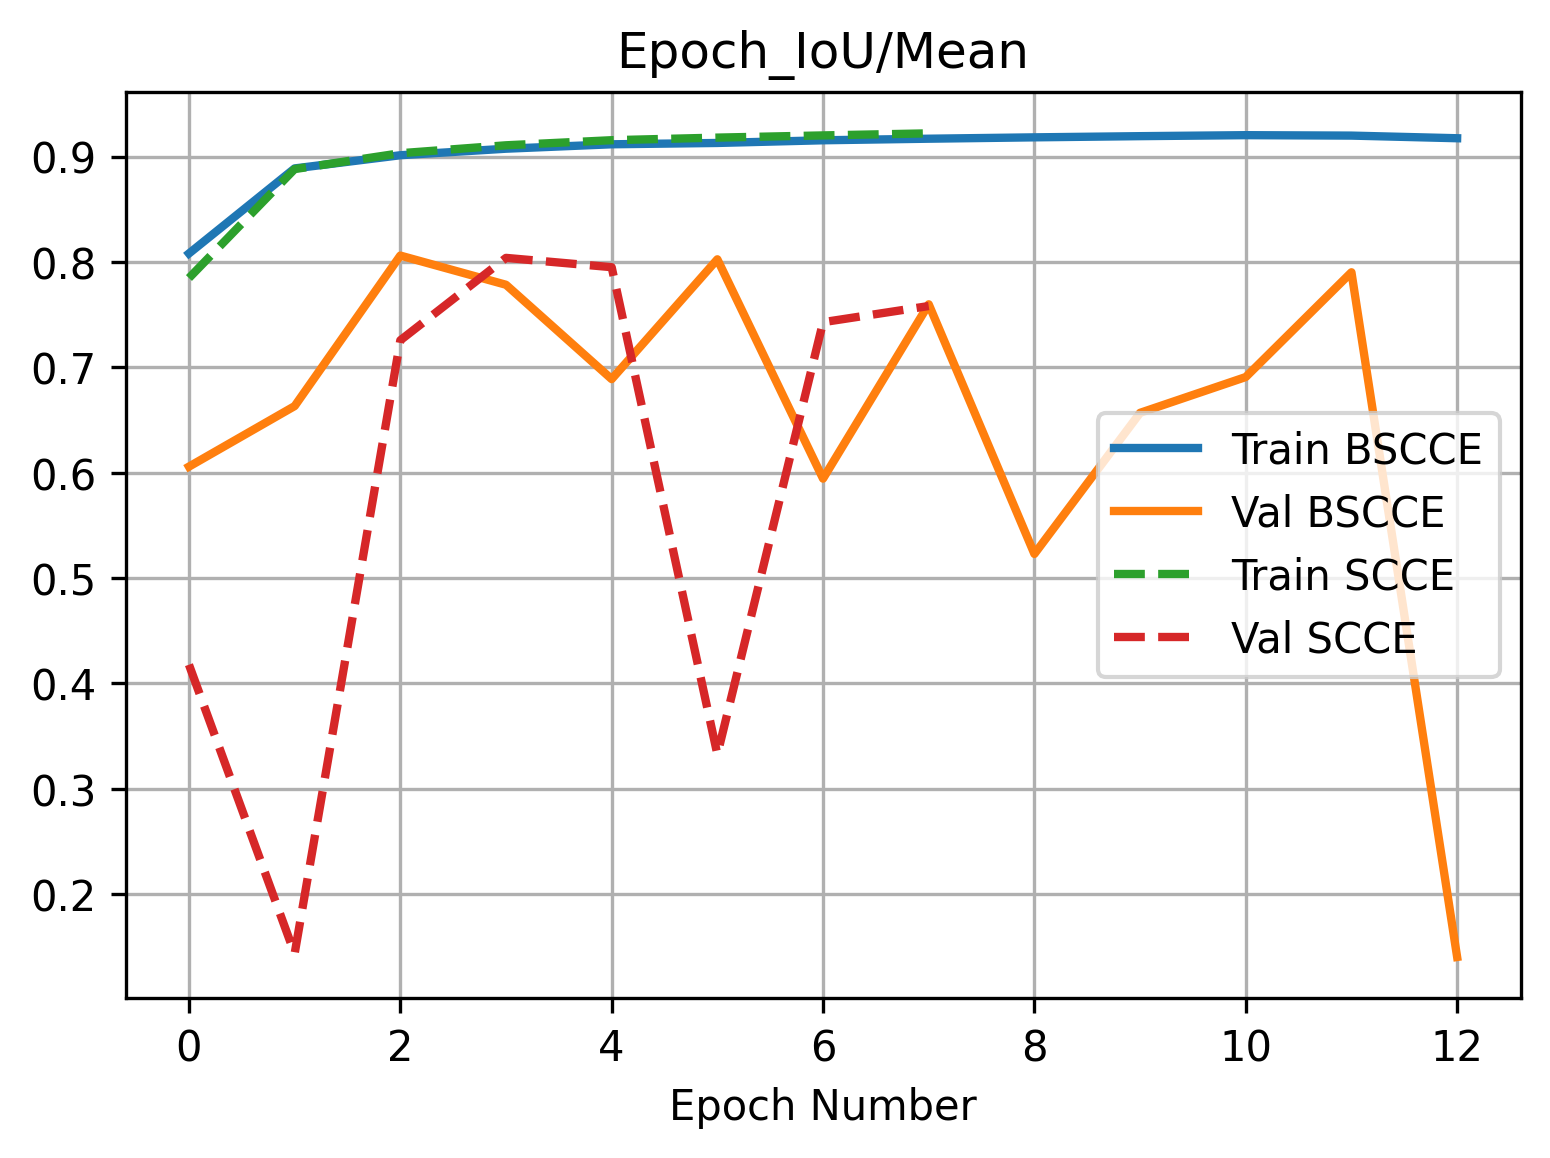

In [17]:
plt.figure(dpi=300)
plt.plot(epoch_train_mean_bscce[0], epoch_train_mean_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_mean_bscce[0], epoch_val_mean_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.plot(epoch_train_mean_scce[0], epoch_train_mean_scce[1], '--', linewidth=2, label='Train SCCE')
plt.plot(epoch_val_mean_scce[0], epoch_val_mean_scce[1], '--', linewidth=2, label='Val SCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Mean')
plt.grid()
plt.legend()

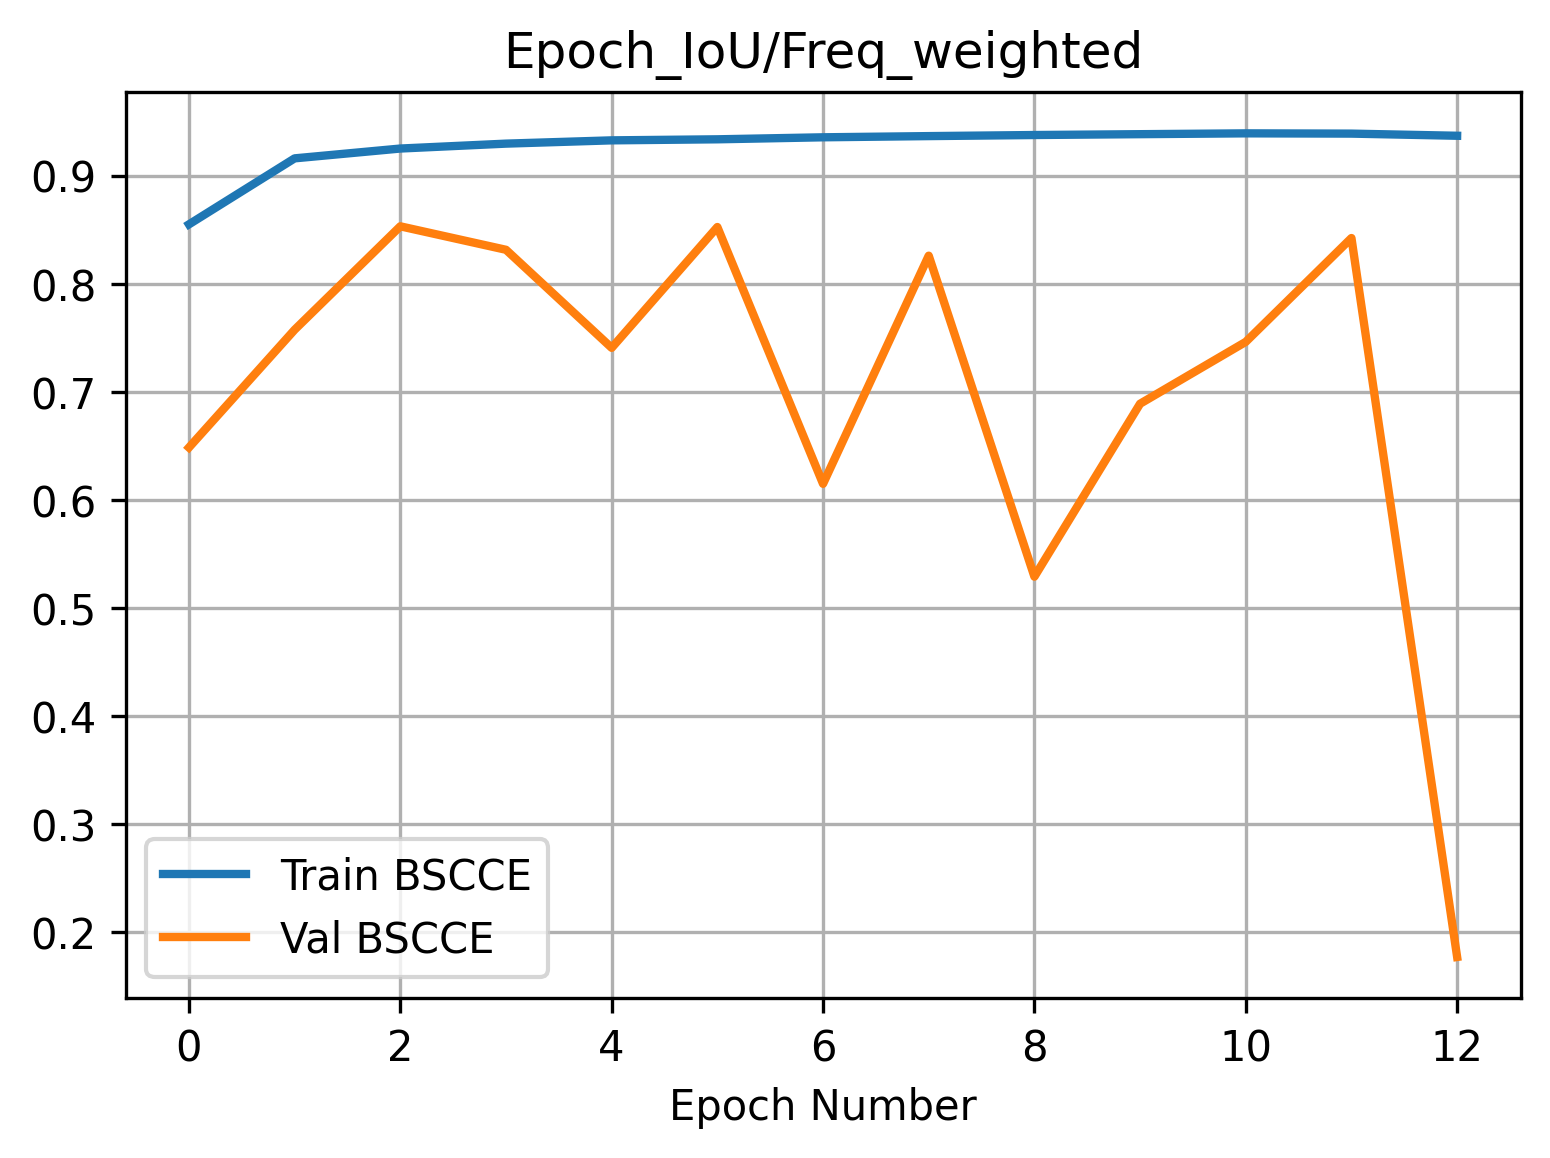

In [13]:
plt.figure(dpi=300)
plt.plot(epoch_train_freq_bscce[0], epoch_train_freq_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_freq_bscce[0], epoch_val_freq_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Freq_weighted')
plt.grid()
plt.legend()

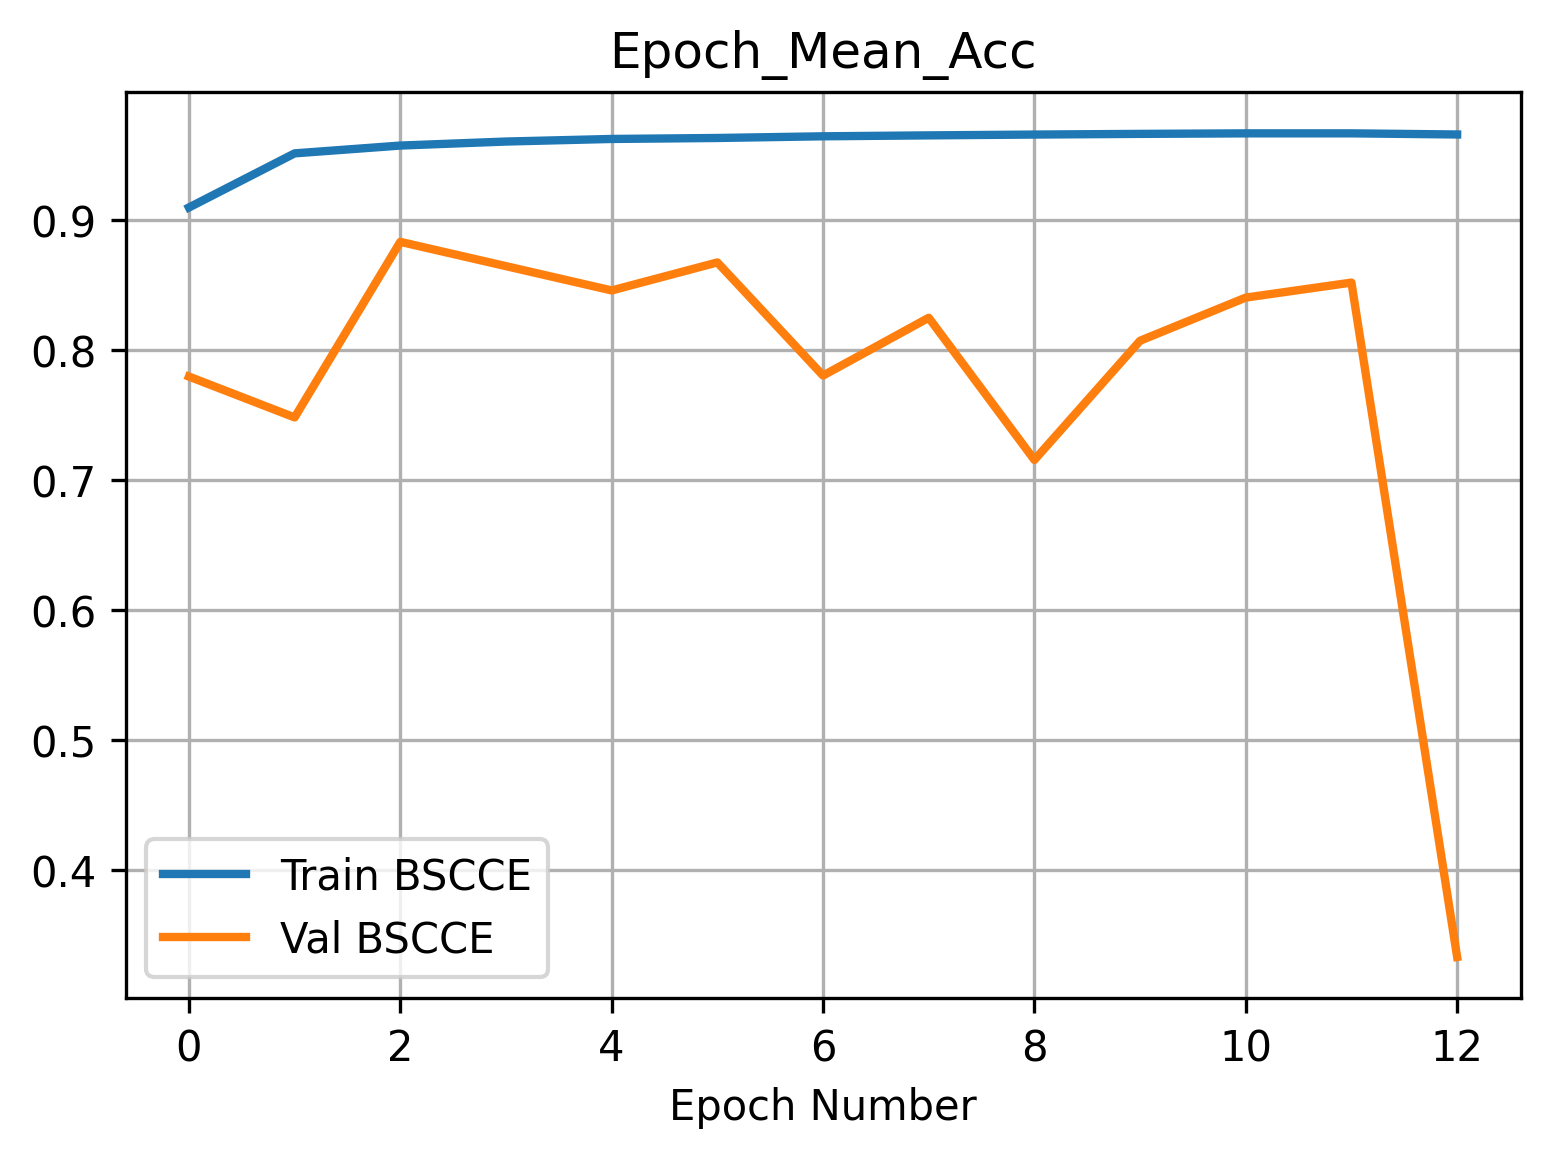

In [14]:
plt.figure(dpi=300)
plt.plot(epoch_train_meanacc_bscce[0], epoch_train_meanacc_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_meanacc_bscce[0], epoch_val_meanacc_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_Mean_Acc')
plt.grid()
plt.legend()

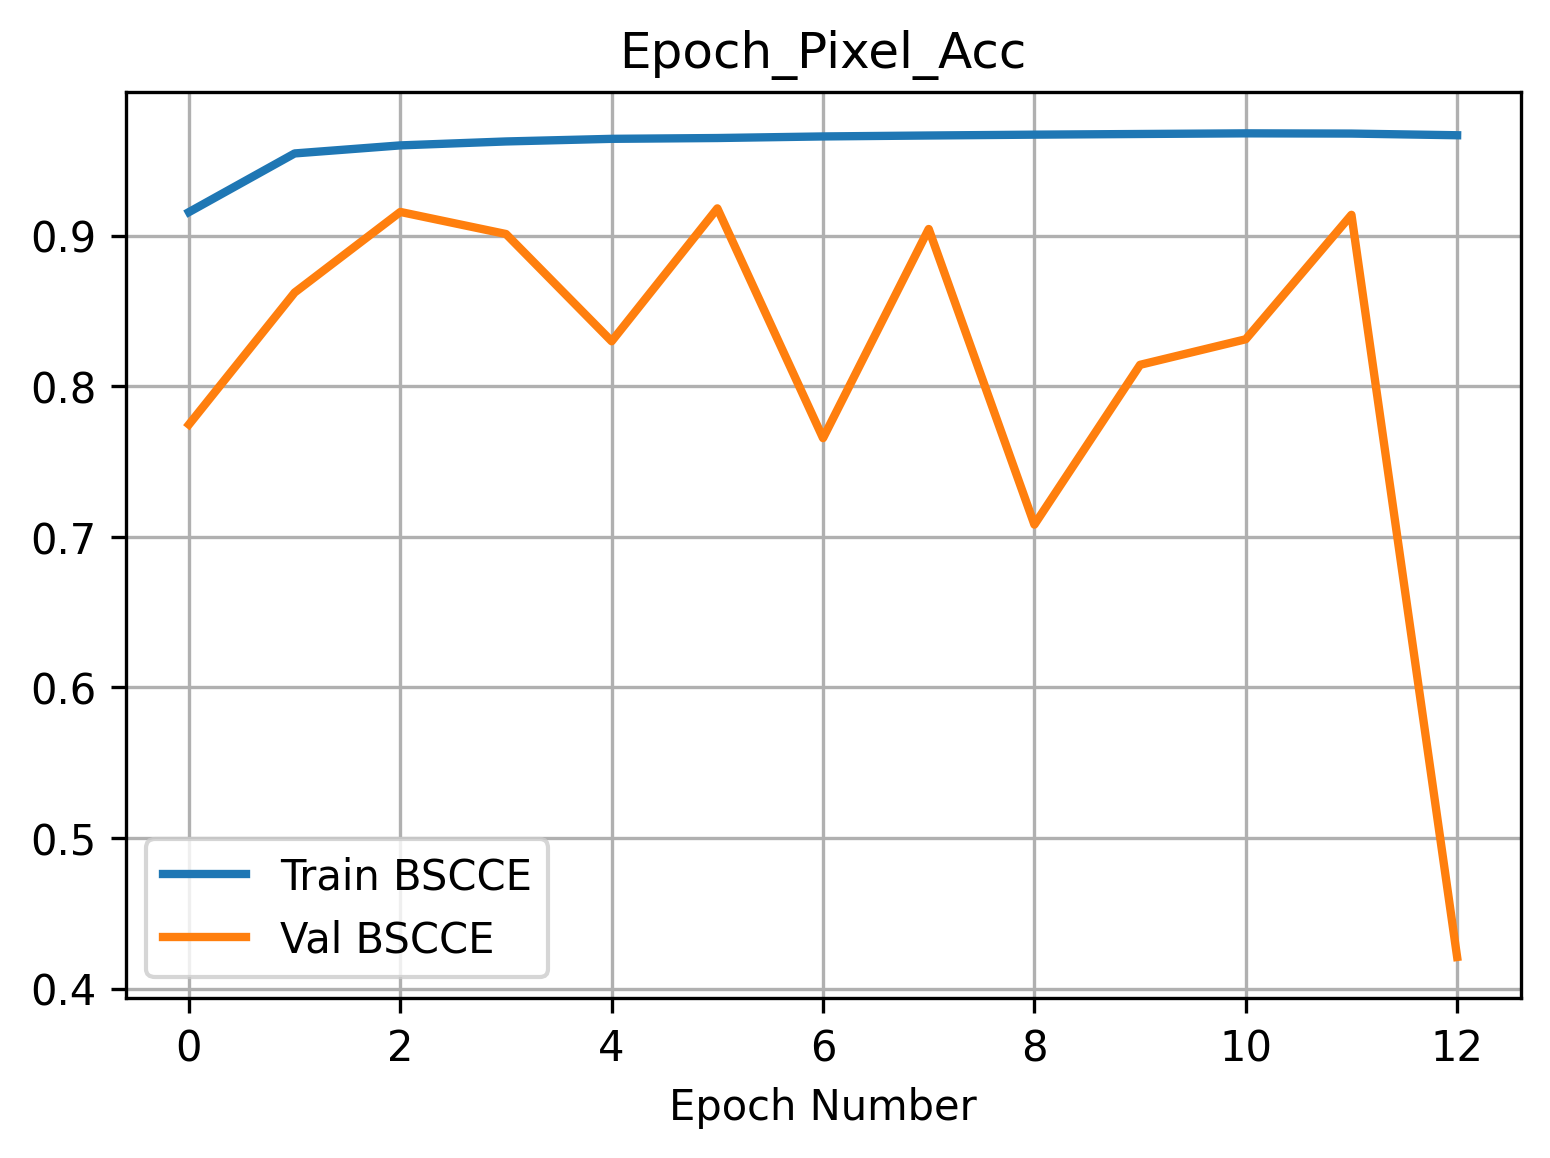

In [15]:
plt.figure(dpi=300)
plt.plot(epoch_train_pixacc_bscce[0], epoch_train_pixacc_bscce[1], '-', linewidth=2, label='Train BSCCE')
plt.plot(epoch_val_pixacc_bscce[0], epoch_val_pixacc_bscce[1], '-', linewidth=2, label='Val BSCCE')
plt.xlabel('Epoch Number')
plt.title('Epoch_Pixel_Acc')
plt.grid()
plt.legend()

### UNet_Zero_Pad_2019O-512-SCCE
Combining retrain results of epoch IoU

In [26]:
### UNet_Zero_Pad_2019O-512-SCCE
### Combining retrain results of epoch IoU
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class0_Background.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Class2_White_Matter.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean = (step+step_re, value+value_re)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_validation-tag-epoch_IoU_Mean.csv')
_, step_re, value_re \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE-retrain_20200613_124255_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean = (step+step_re, value+value_re)

In [27]:
### UNet_Zero_Pad-512-SCCE2
_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class0_Background.csv')
epoch_train_back_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class0_Background.csv')
epoch_val_back_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_train_gray_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class1_Gray_Matter.csv')
epoch_val_gray_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_train_white_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Class2_White_Matter.csv')
epoch_val_white_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_train-tag-epoch_IoU_Mean.csv')
epoch_train_mean_old = (step, value)

_, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad-512-BSCCE2_validation-tag-epoch_IoU_Mean.csv')
epoch_val_mean_old = (step, value)

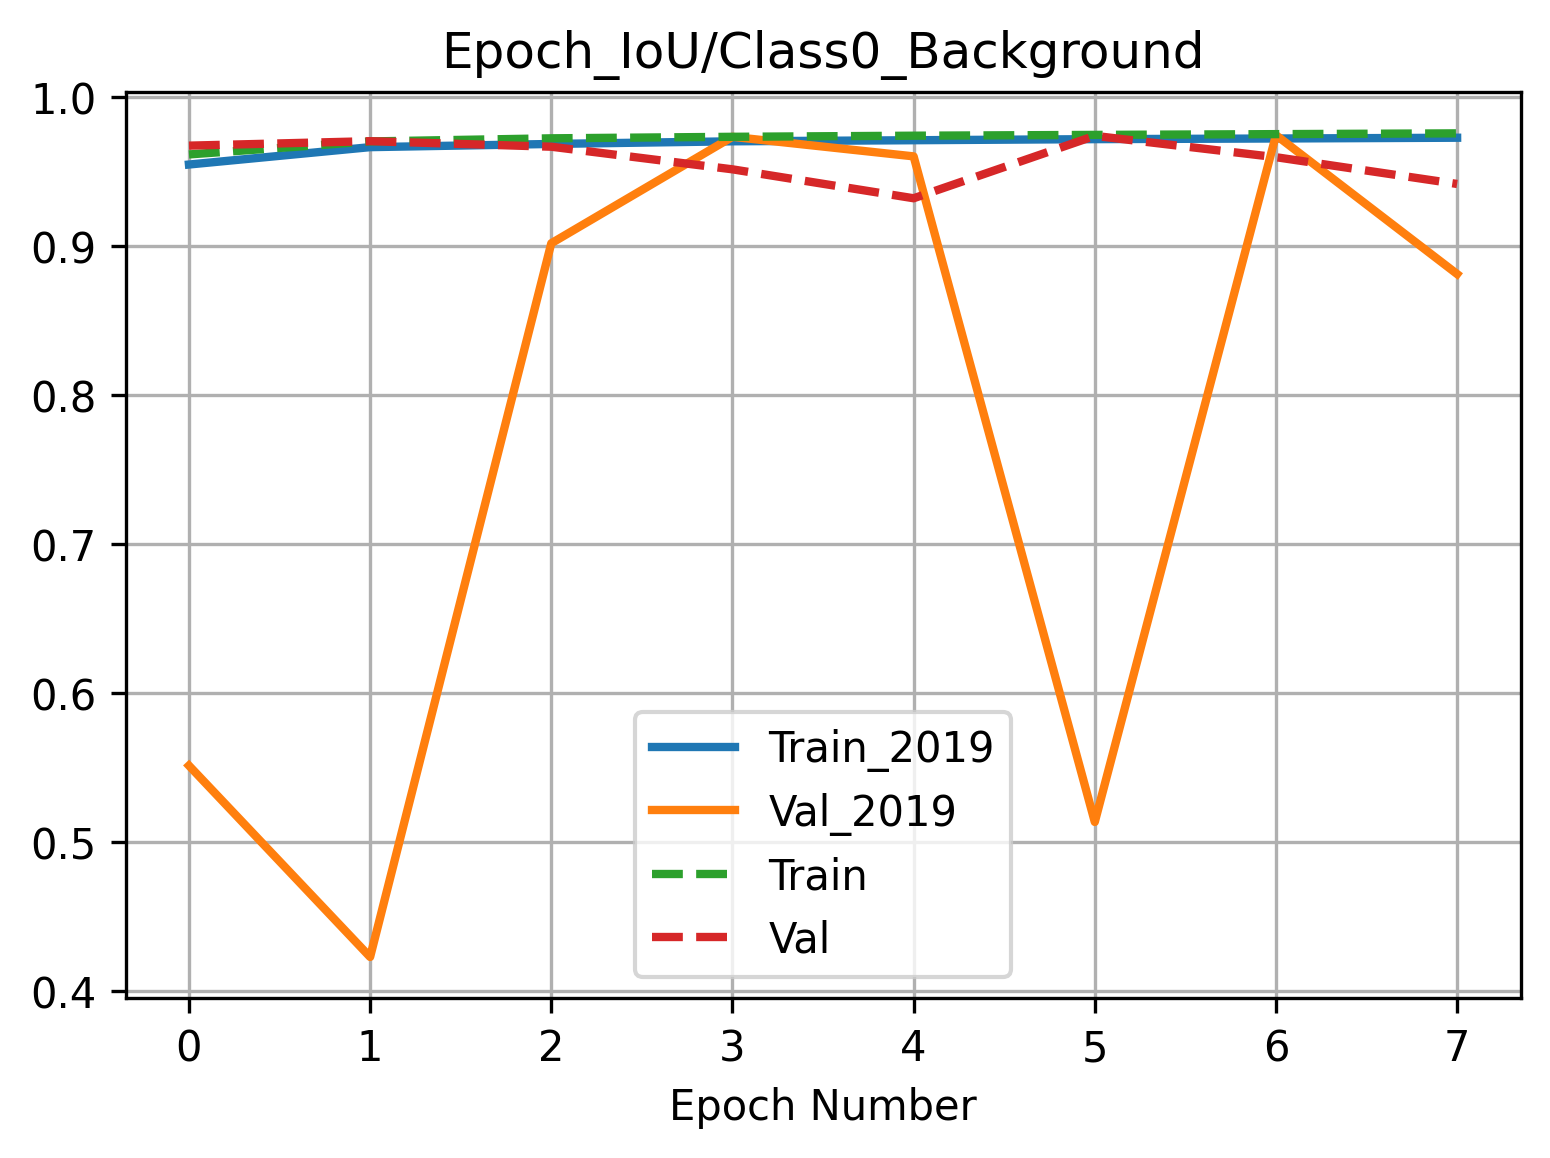

In [28]:
plt.figure(dpi=300)
plt.plot(epoch_train_back[0], epoch_train_back[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_back[0], epoch_val_back[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_back_old[0], epoch_train_back_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_back_old[0], epoch_val_back_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class0_Background')
plt.grid()
plt.legend()

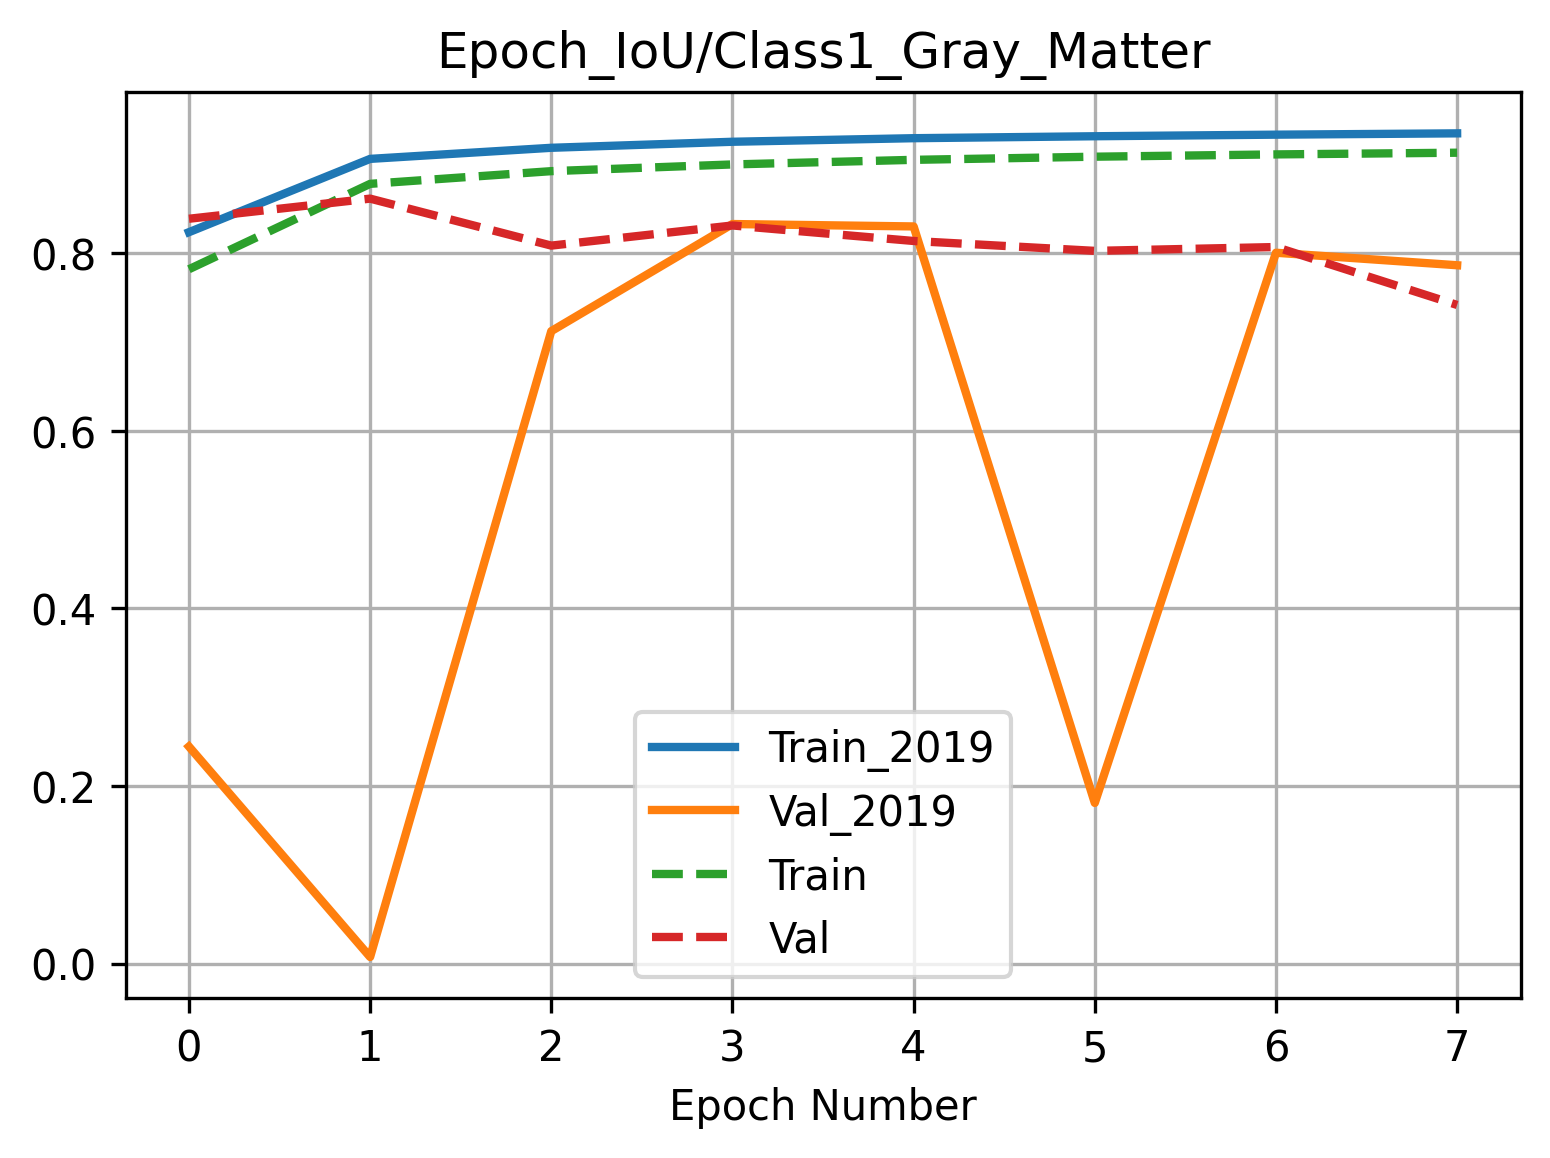

In [29]:
plt.figure(dpi=300)
plt.plot(epoch_train_gray[0], epoch_train_gray[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_gray[0], epoch_val_gray[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_gray_old[0], epoch_train_gray_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_gray_old[0], epoch_val_gray_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class1_Gray_Matter')
plt.grid()
plt.legend()

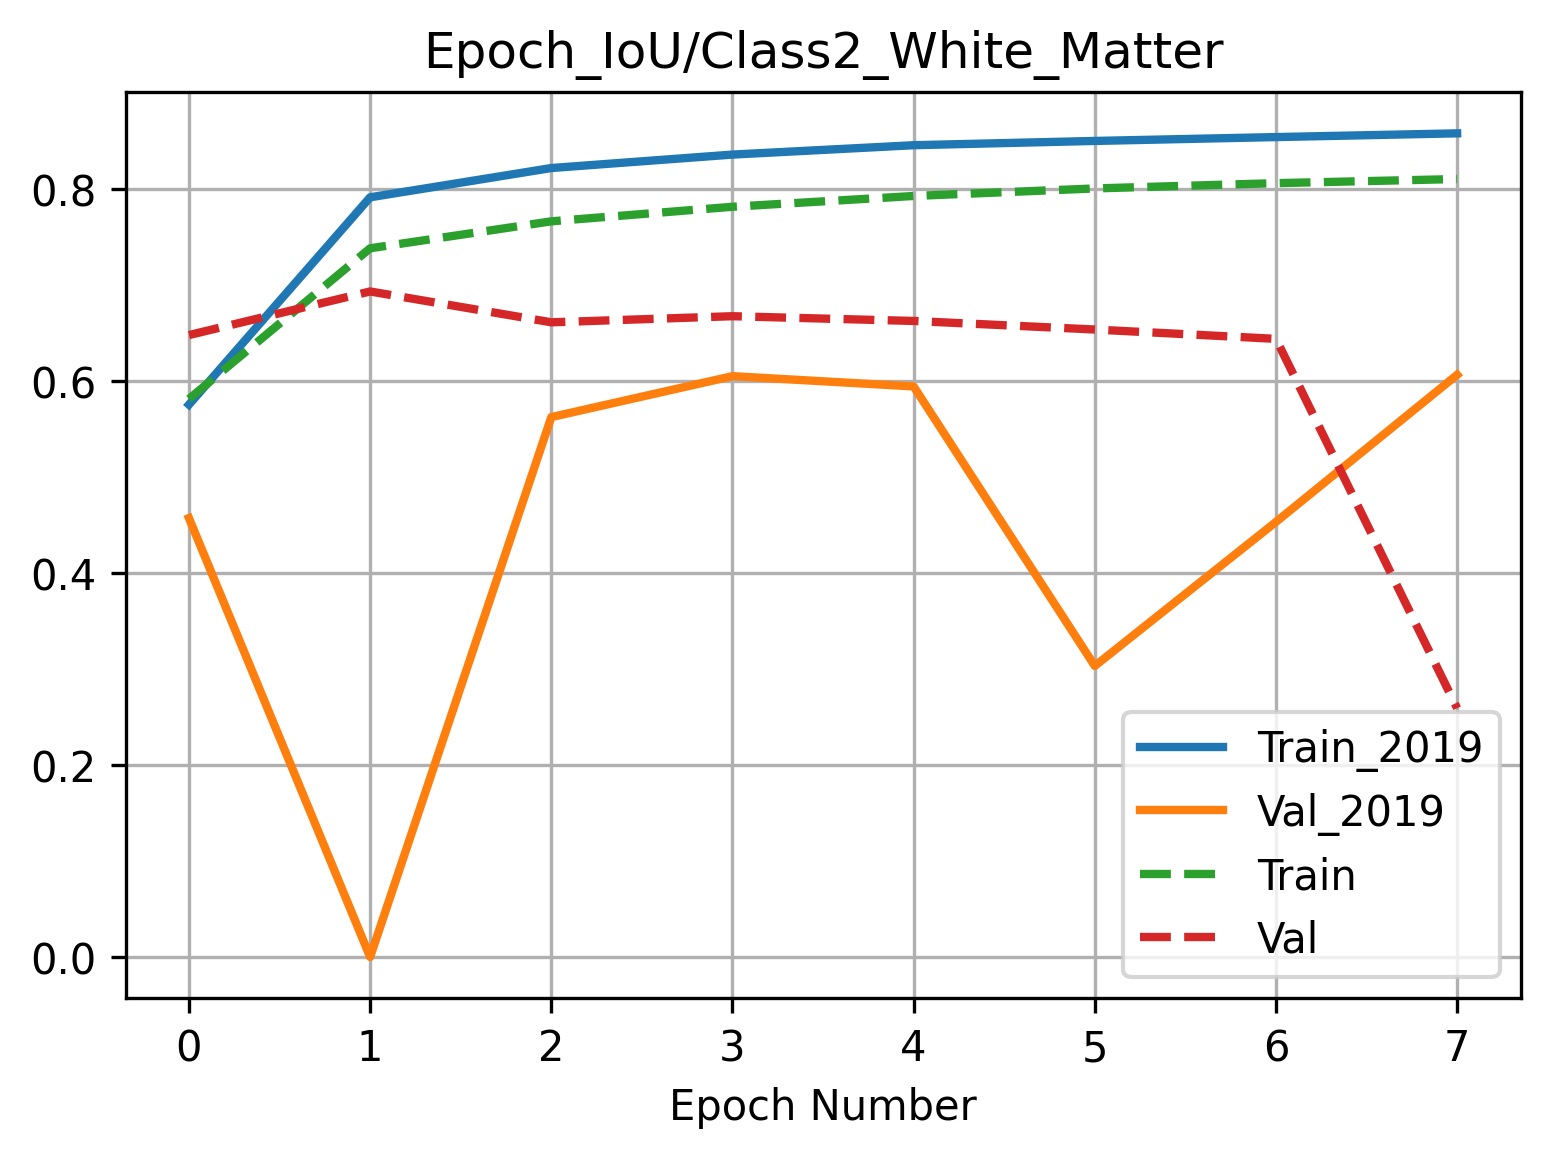

In [30]:
plt.figure(dpi=300)
plt.plot(epoch_train_white[0], epoch_train_white[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_white[0], epoch_val_white[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_white_old[0], epoch_train_white_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_white_old[0], epoch_val_white_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Class2_White_Matter')
plt.grid()
plt.legend()

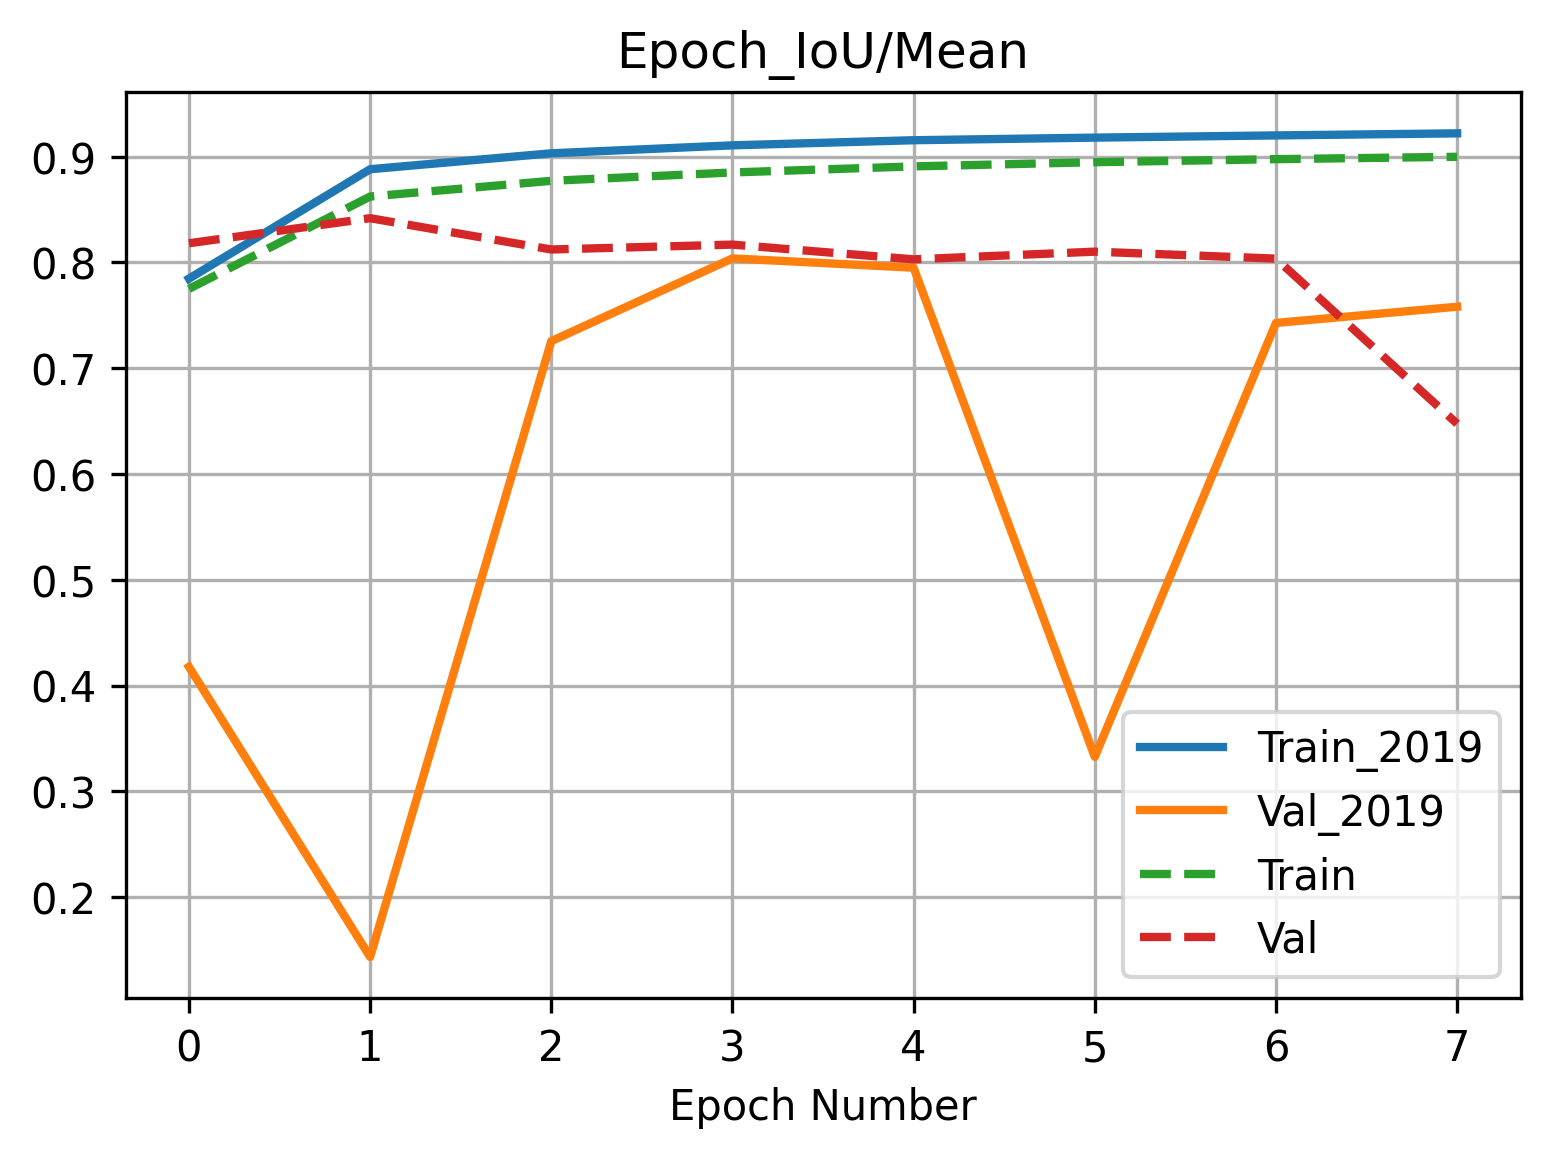

In [31]:
plt.figure(dpi=300)
plt.plot(epoch_train_mean[0], epoch_train_mean[1], '-', linewidth=2, label='Train_2019')
plt.plot(epoch_val_mean[0], epoch_val_mean[1], '-', linewidth=2, label='Val_2019')
plt.plot(epoch_train_mean_old[0], epoch_train_mean_old[1], '--', linewidth=2, label='Train')
plt.plot(epoch_val_mean_old[0], epoch_val_mean_old[1], '--', linewidth=2, label='Val')
plt.xlabel('Epoch Number')
plt.title('Epoch_IoU/Mean')
plt.grid()
plt.legend()